# Statistics for Data Science w/ Python #
### Project Case: Boston Housing Data ###

**Author: Jonathan Diaz**

Date: June 28th, 2024

#### Dataset Variables

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Task 2

*For all visualizations, please include a title in each graph and appropriate labels*

**Generate the following and explain your findings:**

- For the "Median value of owner-occupied homes" provide a boxplot

- Provide a  bar plot for the Charles river variable

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

- Create a histogram for the pupil to teacher ratio variable

## Task 3


*For each of the following questions;*

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

*Be sure to:*

- State your hypothesis.

- Use α = 0.05

- Perform the test Statistics.

- State the conclusion from the test.

#### Python Libraries vv

In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

ModuleNotFoundError: No module named 'piplite'

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

ModuleNotFoundError: No module named 'js'

### Data Extraction Via Pandas Dataframe

In [69]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.shape

(506, 14)

In [9]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## TASK 2: Visualizations- Titles & Lables

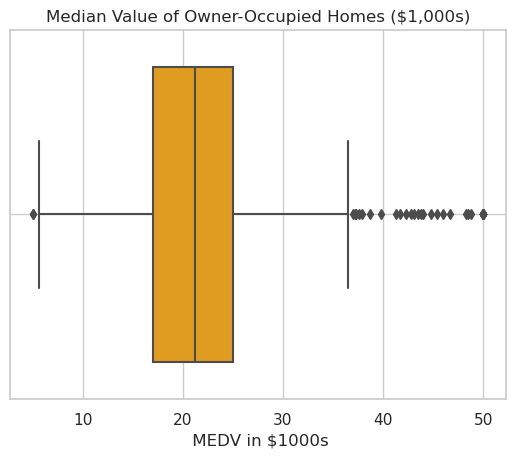

In [21]:
## BoxPlot: Median value of owner-occupied homes

bp_medv = sns.boxplot(x ='MEDV', color = 'orange', data = boston_df)
bp_medv.set_title("Median Value of Owner-Occupied Homes ($1,000s)")
plt.xlabel(' MEDV in $1000s')
plt.grid(True)
plt.show()

In [18]:
boston_df['MEDV'].median()

21.2

**Interpretation:** From the boxplot visual we can observe a right skewed distribution due in part to many outlier cases beyond the last quartile. We can determine and thus confirm the median of the Median Value of Owner-Occupied homes is approximately $ 21.2K (in thousands)

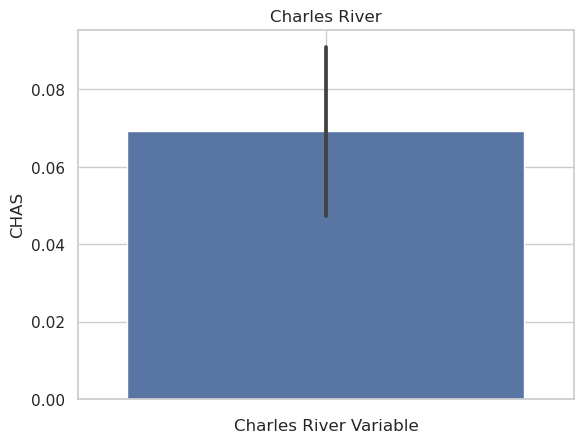

In [36]:
## Provide a bar plot for the Charles river variable

barplot = sns.barplot(y="CHAS", data = boston_df)
barplot.set_title("Charles River")
plt.xlabel('Charles River Variable')
plt.grid(True)
plt.show()

**Interpretation:** Based on the Charles River dummy variable barplot distribution, it does not appear that there are many cases where a property's track bounds a river. 

In [50]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '< 35 Years'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = '35 to 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 >'

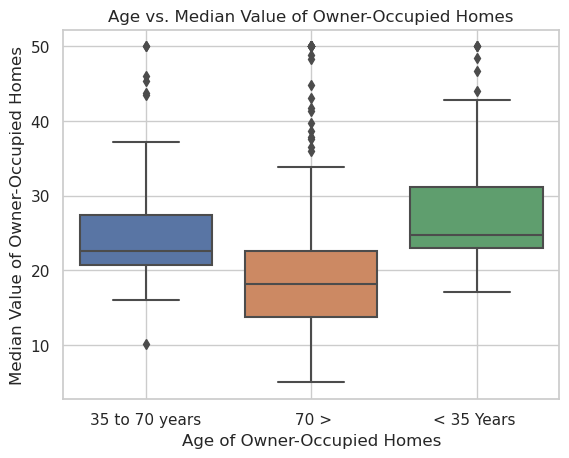

In [37]:
## BOXPLOT: MEDV variable vs the AGE variable. 
## (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

sns.boxplot(x = "AGE_GROUP", y ='MEDV', data = boston_df)
plt.title('Age vs. Median Value of Owner-Occupied Homes')
plt.xlabel('Age of Owner-Occupied Homes')
plt.ylabel('Median Value of Owner-Occupied Homes')
plt.grid(True)
plt.show()

**Interpretation:** From our discretized Boxplot of owner-occupied home ages and their MEDV in 1,000s, we notice a decrease in median value the older the home. Homes built 35 years and earlier are observed to have the highest median value while homes built 70 years ago or before share a distract drop in value, with the low below 5,000

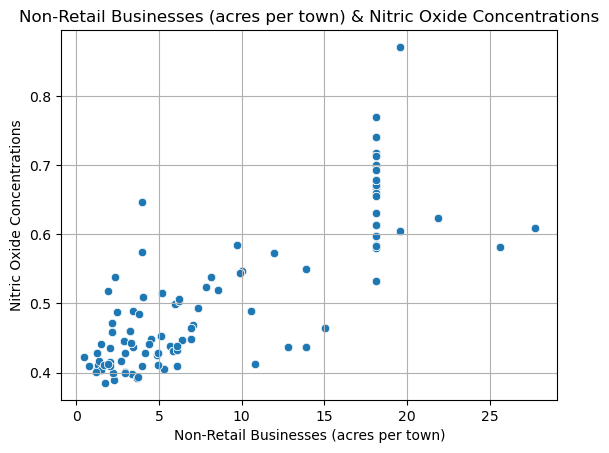

In [10]:
'''Scatterplot: Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
What can you say about the relationship? '''

scatterplot = sns.scatterplot(x='INDUS', y='NOX', data= boston_df)
scatterplot.set_title("Non-Retail Businesses (acres per town) & Nitric Oxide Concentrations")
plt.xlabel('Non-Retail Businesses (acres per town)')
plt.ylabel('Nitric Oxide Concentrations')
plt.grid(True)
plt.show()

**Interpretation:** While there is not many cases of huge acre, Non-Retail based business properties in the data, we can observe a positive coorelation as the proportion of acres taken by idustrial facilties increases. The nitric oxide concentration levels (parts per 10 million) overall increases when Non-retail bussinesses (acres per town) increases. 

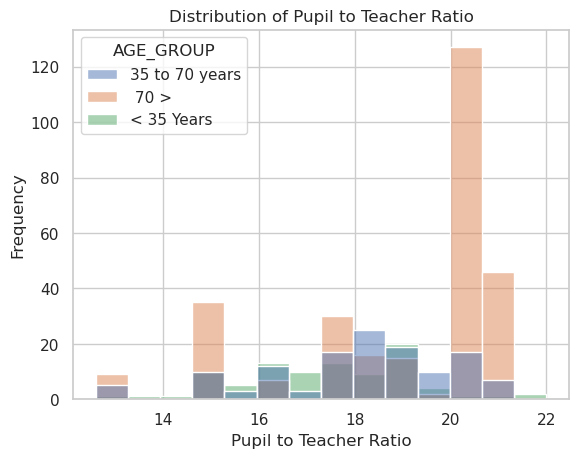

In [39]:
## Histogram: pupil to teacher ratio variable - PTRATIO

sns.histplot(data = boston_df, x='PTRATIO', hue = 'AGE_GROUP', color = 'darkgreen', kde = False)
plt.title('Distribution of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Interpretation:** I decided to implement the Age Group of homes to examine more data and found that there is an overwhelming case for the pupil to teacher ratio in towns with the oldest homes. Approximately 18 pupils per 1 teacher seems to be the average per town, with a healthy mix of different home ages. There is no obvious pattern here outside of what is previously stated. 

## TASK 3: Hypothesis Testing

- State your hypothesis.

- Use α = 0.05

- Perform the test Statistics.

- State the conclusion from the test.

**Questions**
1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [60]:
#1.  T- Test for Independent Samples 

'''Statement of Hypothesis: 

H_0: There is no difference in median value of houses bounded by the Charles River
H_A: There is a significant difference in median value of houses bounded by the Charles River

alpha = 0.05 or 5%'''

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

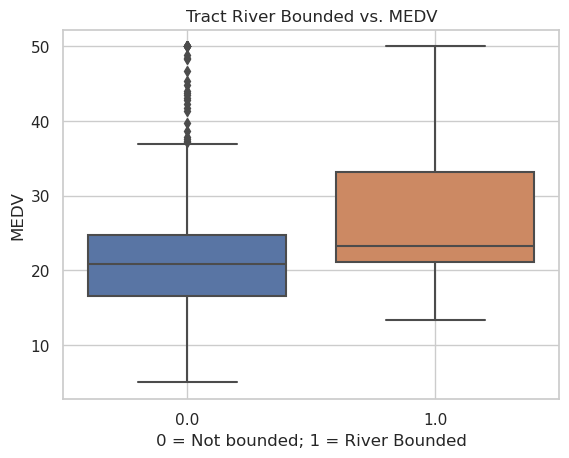

In [42]:
sns.boxplot(x = "CHAS", y ='MEDV', data = boston_df)
plt.title('Tract River Bounded vs. MEDV')
plt.xlabel('0 = Not bounded; 1 = River Bounded')
plt.ylabel('MEDV')
plt.grid(True)
plt.show()

**Conclusion:** Even though a visualization of the two attributes display a difference in median value as per tract being river bounded, because the P-Value is greater than our alpha, we refuse to reject the null hypothesis. The null hypothesis asserts there is no signficant difference between median value of houses bounded by the Charles River.

In [61]:
#2. ANOVA for Age(categories) vs. MEDV

'''Statement of Hypothesis: 

H_0: The communities of homes built within 35 years ago, between 35 and 70 years ago, and 70 years ago or more are equal in terms of MEDV
H_A: At least one of the communities differs 

alpha = 0.05 or 5%'''


lower_thirtyfive = boston_df[boston_df['AGE_GROUP'] == '< 35 Years']['MEDV']
thirty_to_seventy = boston_df[boston_df['AGE_GROUP'] == '35 to 70 years']['MEDV']
higher_seventy = boston_df[boston_df['AGE_GROUP'] == '70 >']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(lower_thirtyfive, thirty_to_seventy, higher_seventy)

print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Our P-value is well under the alpha; p- value < a - Therefore, we reject the null hypothesis and assert there is significant evidence that one of these communities MEDV means differs 

In [63]:
#3. Pearson Correlation of Nitric Oxide Concentrations and Industrial Properties in Acres per Town

'''Statement of Hypothesis: 

H_0: Nitric Oxide Concentrations and the amount of Acres per Town taken by Industrial Properties is not coorelated 
H_A: Nitric Oxide Concentrations are coorelated with Acres per Town taken by Industrial Properties

alpha = 0.05 or 5%'''

scipy.stats.pearsonr(boston_df['INDUS'], boston_df['MEDV'])

PearsonRResult(statistic=-0.483725160028373, pvalue=4.9002599817523505e-31)

**Conclusion:** Since P-Value is < than the alpha (5%), we conclude that a relationship exists between Nitric Oxide Concentrations and Acres per Town taken by Industrial Properties

In [65]:
#4. Regression Analysis: Impact of Weighed Distance and MEDV

'''Statement of Hypothesis: 

H_0: Beta 1 = 0 - Additional Weighted Distance (to the 5 Boston Employement Centres) has no effect on Median Value of Owner Occupied Homes
H_A: Beta 1 != 0 - Additional Weighted Distance (to the 5 Boston Employement Centres) does have an effect on Median Value of Owner Occupied Homes

alpha = 0.05 or 5%'''

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        18:15:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
from scipy import stats

# Assuming 'data1' and 'data2' are your two sets of data
t_stat, p_value = stats.ttest_ind(X, y)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: [-52.66532772 -44.67323653]
P-value: [6.38226883e-292 2.03362828e-241]


/tmp/wsuser/ipykernel_163/1586705142.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(X, y)


**Conclusion:** The P-value is less than the alpha level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in mean additional weighted distance and MEDV. There is signifcant evidence to assert that this additional distance does effect the median value of owner occupied homes. The coefficient 1